In [1]:
#!pipenv install mplfinance
#!pipenv

In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import warnings
#warnings.simplefilter('ignore')

In [2]:
#file_list = ['-20', '-19_0', '-19_1', '-18_0', '-18_1', '-17_0', '-17_1', '-16_0', '-16_1', '-15_0', '-15_1', '-14_0', '-14_1', '-13_0', '-13_1', '-12_0', '-12_1', '-11_0', '-11_1', '-10_0', '-10_1', '-9_0', '-9_1', '-8_0', '-8_1', '-7_0', '-7_1', '-6_0', '-6_1', '-5_0', '-5_1', '-4_0', '-4_1', '-3_0', '-3_1', '-2_0', '-2_1', '-1_0', '-1_1','-0_0','-0_1','0','0_0', '0_1','1_0', '1_1', '2_0', '2_1', '3_0', '3_1', '4_0', '4_1', '5_0', '5_1', '6_0', '6_1', '7_0', '7_1', '8_0', '8_1', '9_0', '9_1', '10_0', '10_1', '11_0', '11_1', '12_0', '12_1', '13_0', '13_1', '14_0', '14_1', '15_0', '15_1', '16_0', '16_1', '17_0', '17_1', '18_0', '18_1', '19_0', '19_1', '20']
file_list = ['_-1','0','1_']
for file_name in file_list:
    new_dir_path = '../data/loson/test/' + file_name
    new_dir_path = '../data/loson/train/' + file_name
    os.makedirs(new_dir_path, exist_ok=True)

In [3]:
df = pd.read_csv('../data/loson/loson.csv', index_col=0, parse_dates=True)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume','per_100']
df_row = pd.read_csv('../data/sony/sony_data.csv')
print(df)

              Open    High     Low   Close  Volume  per_100
data                                                       
2020-12-01  4725.0  4740.0  4705.0  4735.0   174.5     0.11
2020-11-30  4760.0  4770.0  4705.0  4730.0   860.0    -2.07
2020-11-27  4825.0  4850.0  4810.0  4830.0   312.4    -1.23
2020-11-26  4890.0  4910.0  4875.0  4890.0   177.5    -1.41
2020-11-25  4975.0  4985.0  4955.0  4960.0   156.9     0.30
...            ...     ...     ...     ...     ...      ...
2020-08-24  5190.0  5230.0  5180.0  5230.0    82.1     0.19
2020-08-21  5260.0  5260.0  5180.0  5220.0   167.5    -1.32
2020-08-20  5330.0  5330.0  5280.0  5290.0   161.0    -1.12
2020-08-19  5340.0  5360.0  5330.0  5350.0    95.6     0.75
2020-08-18  5320.0  5350.0  5300.0  5310.0   158.8      NaN

[71 rows x 6 columns]


In [4]:
#mpf.plot(df[0:30], type='candle', figratio=(12,4),savefig='../data/apple_data/train/0/candlestick_mpf_candle.png')

In [5]:
close = np.array(df_row["close"])
date = np.array(df_row["data"])
close

array([9800., 9704., 9812., ..., 3980., 4050., 4100.])

In [6]:
close_first = np.delete(close,-1)
close_second = np.delete(close,0)
#print(len(close_first),len(close_second))
close_per_100 = (close_first - close_second) / close_second * 100
#close_per_10000 = (close_first - close_second) / close_second * 10000
close_per_sort = np.sort(close_per_100)

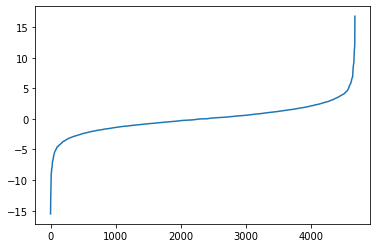

In [7]:
plt.plot(close_per_sort)

### thetaの作成

In [8]:
theta_list = [-1]
while theta_list[-1] != 1:
    theta_list.append(theta_list[-1] + 2)

print(len(theta_list),theta_list)
print(len(file_list),file_list)

2 [-1, 1]
3 ['_-1', '0', '1_']


### データわけの確認

In [9]:
count_data = [0,0,0]
for ele_data in df.values:
    if ele_data[5] > 0:
        count_data[0] += 1
    elif ele_data[5] == 0:
        count_data[1] += 1
    elif ele_data[5] < 0:
        count_data[2] += 1
print(count_data)

[25, 6, 39]


### thetaの幅でデータポイント作成 データ４つ以上

In [10]:
keep = []
point_data = [] 
point = False
theta_ = -200
theta_list.append(200)

for theta in theta_list:
    for ele_data in df.values:
        if theta > ele_data[5] and ele_data[5] > theta_:
            keep.append(list(ele_data[:5]))
    print(theta,">",theta_)
    theta_ = theta
    point_data.append(keep)
    keep = []

-1 > -200
1 > -1
200 > 1


### thetaの幅でデータポイント作成 データ３つ以下

In [11]:
keep = []
point_data = [] 
point = False
theta_list = [0]
theta_ = -200
theta_list.append(200)

for theta in theta_list:
    for ele_data in df.values:
        if theta > ele_data[5] and ele_data[5] > theta_:
            keep.append(list(ele_data[:5]))
    print(theta,">",theta_)
    theta_ = theta
    point_data.append(keep)
    keep = []

0 > -200
200 > 0


### 0でデータポイント作成

In [12]:
point_data_0 = [] 
point = False

for ele_data in df.values:
    if ele_data[5] == 0:
        point_data_0.append(list(ele_data[:5]))
print(len(point_data_0))

6


### データポイントの合成

In [13]:
point_data.append(point_data_0)
print(len(point_data))
for data in point_data:
    print(len(data))

3
39
25
6


# 0

In [14]:
count = 0
data_0 = []
for point in point_data[0]:
    check = False
    keep = []
    for ele_data in df.values:
        if check == True:
            keep.append(ele_data[:5])
            if len(keep) == 7:
                data_0.append(keep)
                check = False
        if point == list(ele_data[:5]):
            count += 1
            check = True
print(count)

39


In [15]:
print(len(data_0))
for i in data_0:
    pass
    #print(len(i))

36


# 1

In [16]:
count = 0
data_1 = []
for point in point_data[1]:
    check = False
    keep = []
    for ele_data in df.values:
        if check == True:
            keep.append(ele_data[:5])
            if len(keep) == 7:
                data_1.append(keep)
                check = False
        if point == list(ele_data[:5]):
            count += 1
            check = True
print(count)

25


In [17]:
print(len(data_1))
for i in data_1:
    pass
    #print(len(i))

22


# 2

In [18]:
count = 0
data_2 = []
for point in point_data[2]:
    check = False
    keep = []
    for ele_data in df.values:
        if check == True:
            keep.append(ele_data[:5])
            if len(keep) == 7:
                data_2.append(keep)
                check = False
        if point == list(ele_data[:5]):
            count += 1
            check = True
print(count)

6


In [19]:
print(len(data_2))
for i in data_2:
    pass
    #print(len(i))

6


# 3

In [211]:
count = 0
data_3 = []
for point in point_data[3]:
    check = False
    keep = []
    for ele_data in df.values:
        if check == True:
            keep.append(ele_data[:5])
            if len(keep) == 7:
                data_3.append(keep)
                check = False
        if point == list(ele_data[:5]):
            count += 1
            check = True
print(count)

1138


In [253]:
print(len(data_3))
count = 0
for i in data_3:
    #print(len(i))
    if 7 != len(i):
        print("7error")
        print(count)
    if count == 1:
        print(i)
    count += 1
    for t in i:
        if 5 != len(t):
            print("5error")

1135
[array([196. , 201. , 196. , 200. ,  63.1]), array([193. , 193. , 190. , 191. ,  29.6]), array([188. , 195. , 187. , 193. , 105.4]), array([185. , 189. , 185. , 188. ,  85.3]), array([188. , 189. , 186. , 187. ,  70.5]), array([196. , 198. , 196. , 198. ,  31.2]), array([200. , 201. , 196. , 198. ,  40.8])]
7error
529


# 4

In [213]:
count = 0
data_4 = []
for point in point_data[4]:
    check = False
    keep = []
    for ele_data in df.values:
        if check == True:
            keep.append(ele_data[:5])
            if len(keep) == 7:
                data_4.append(keep)
                check = False
        if point == list(ele_data[:5]):
            count += 1
            check = True
print(count)

335


In [214]:
print(len(data_4))
for i in data_4:
    pass
    #print(len(i))

335


# 実行関数

In [20]:
def list_to_df(data):
    try:
        df = pd.DataFrame(data,index=[dt(2000,1,1), dt(2000,1,2),dt(2000,1,3), dt(2000,1,4), dt(2000,1,5), dt(2000,1,6), dt(2000,1,7)],columns=['Open', 'High', 'Low', 'Close', 'Volume'])
        return(df)
    except:
        pass

In [21]:
#mpf.plot(data,type='candle', figratio=(12,4),savefig=pass_code + file_list[41] +"/"+ str(file_name) + ".jpg")
def data_to_dataset(data,path_train,path_val):
    file_name_train = 0
    file_name_val = 0
    count = 0
    leng = int(len(data) * (4/5))
    for ele_data in data:
        if count <= leng:
            df_data = list_to_df(ele_data)
            try:
                mpf.plot(df_data,type='candle', figratio=(12,4),savefig=str(path_train) +"/"+ str(file_name_train) + ".jpg")
            except:
                pass
            file_name_train += 1
        else :
            df_data = list_to_df(ele_data)
            try:
                mpf.plot(df_data,type='candle', figratio=(12,4),savefig=str(path_val) +"/"+ str(file_name_val) + ".jpg")
            except:
                pass
            file_name_val += 1
        count += 1
    return leng

In [22]:
#point_data.append(point_data_0)
print(len(point_data))
for data in point_data:
    print(len(data))

3
39
25
6


## 変更必要

28

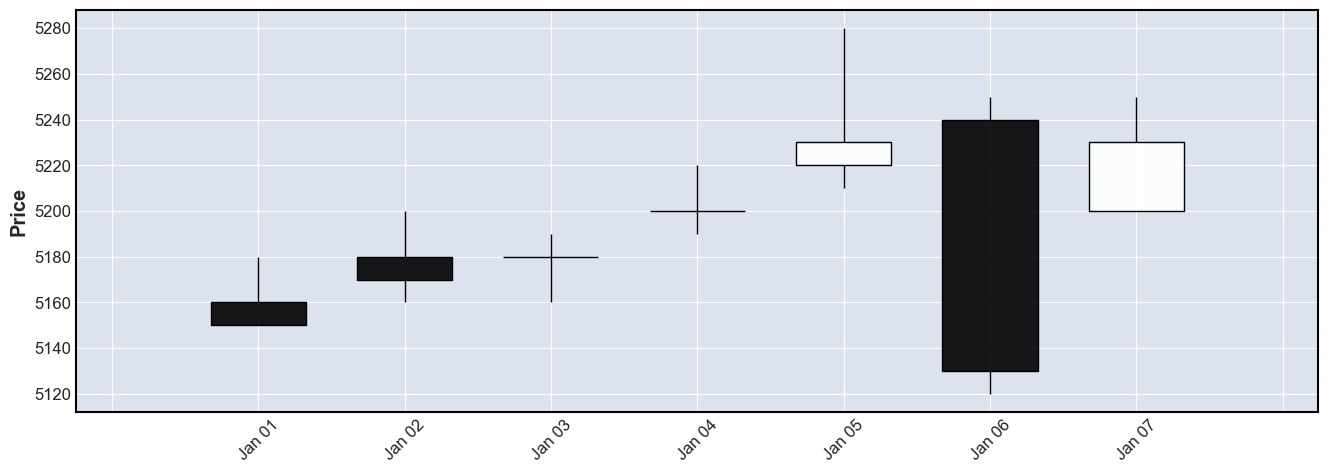

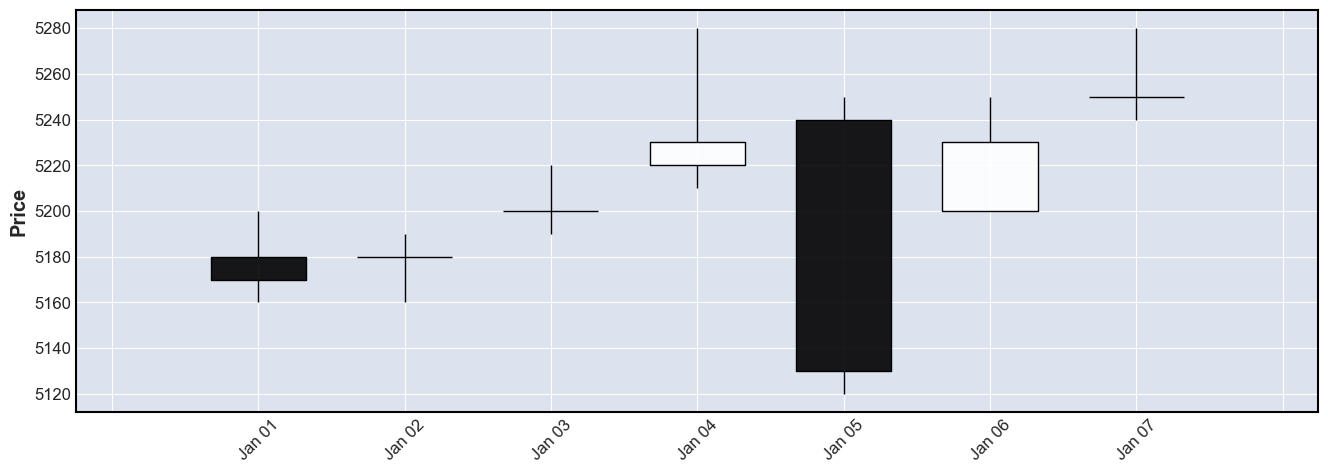

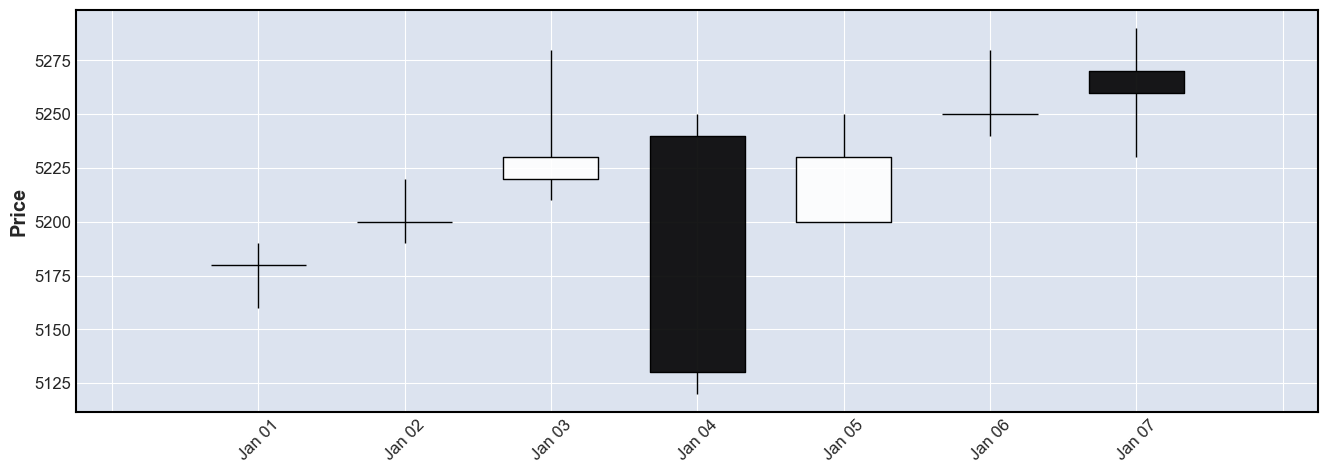

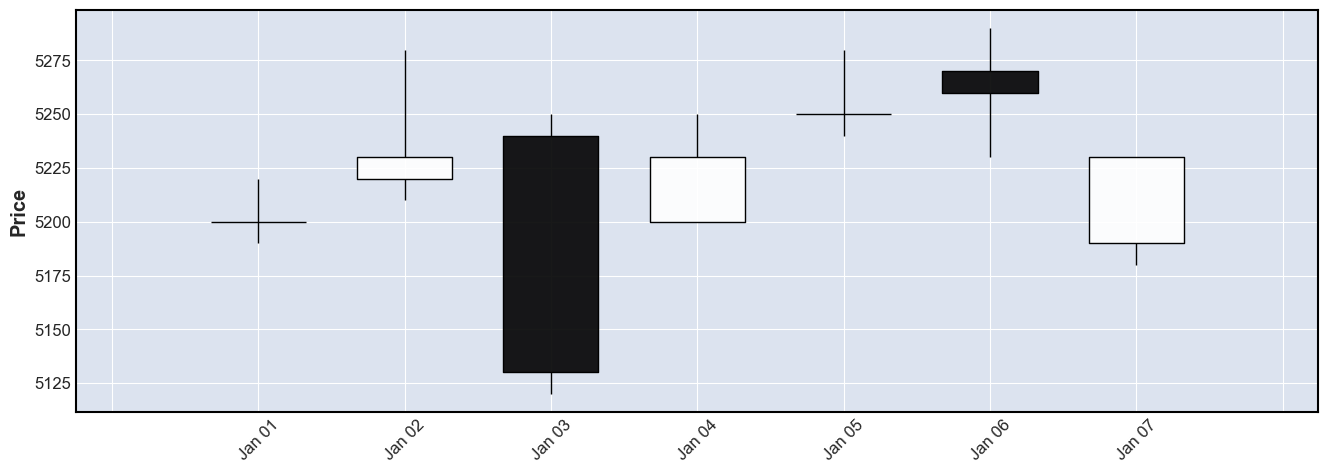

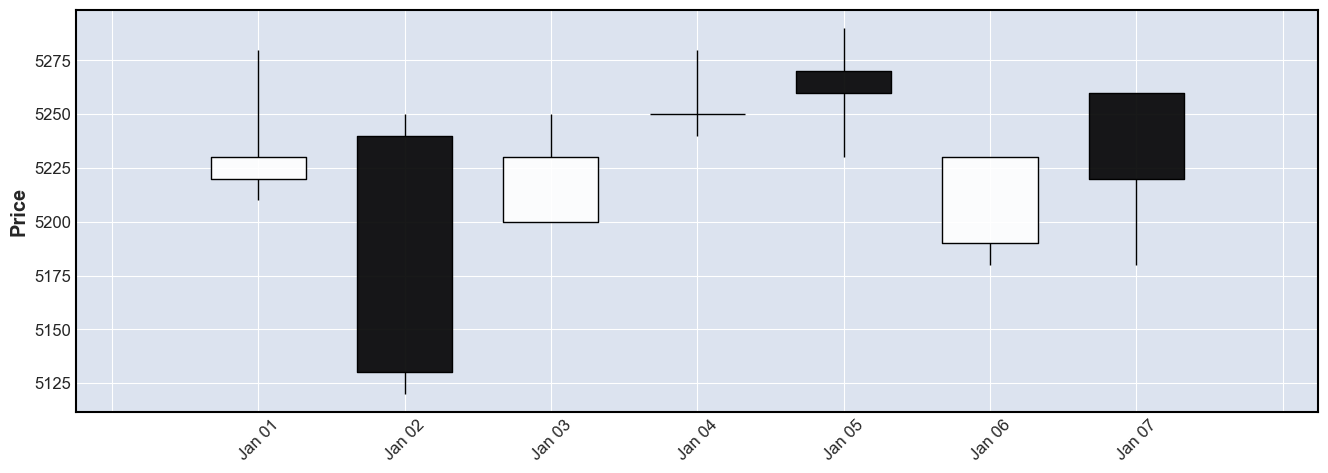

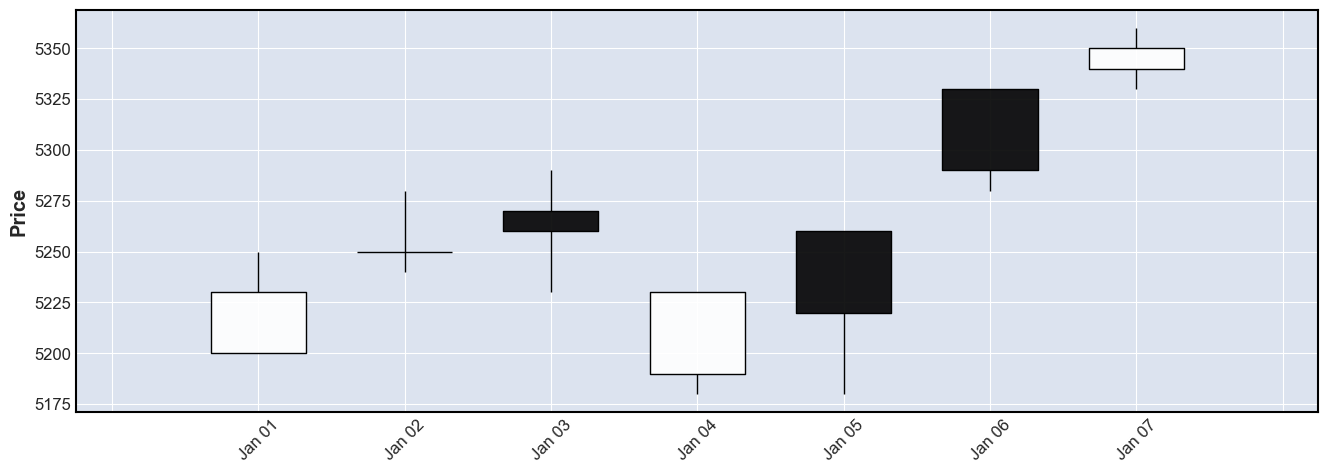

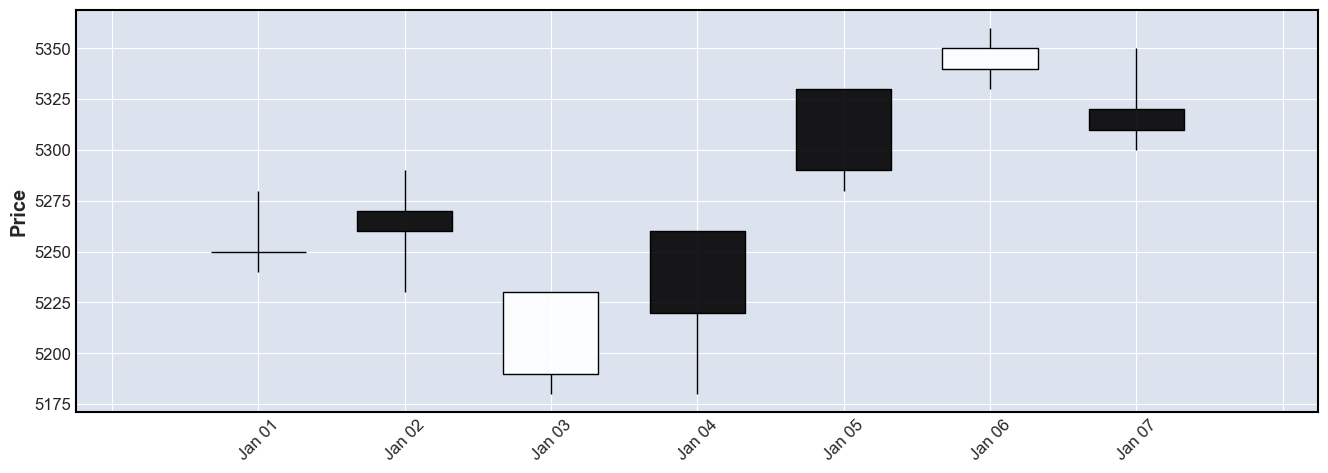

In [26]:
data_to_dataset(data_0,"../data/loson/train/_-1","../data/loson/test/_-1")

17

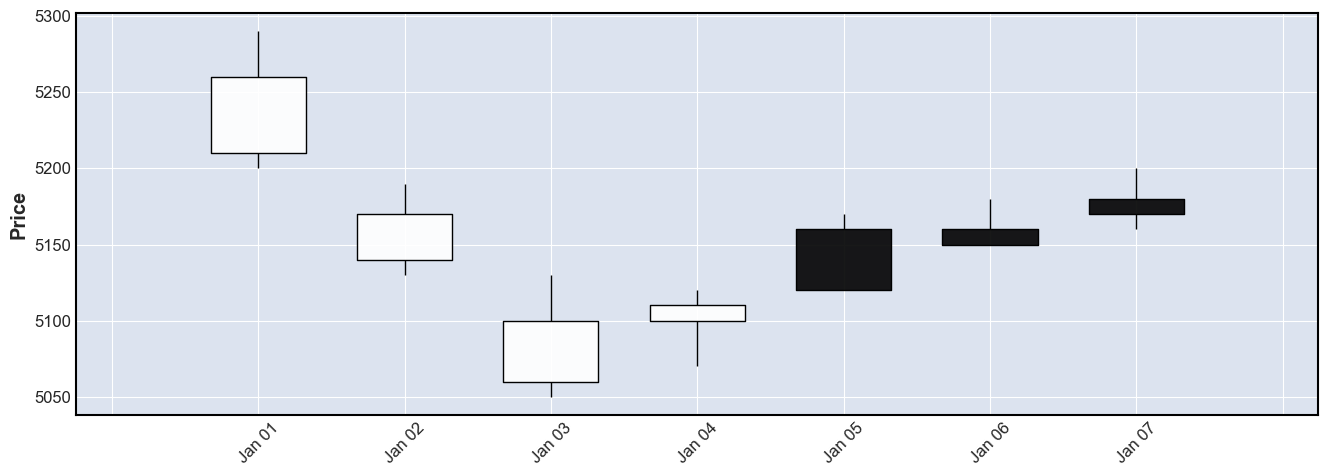

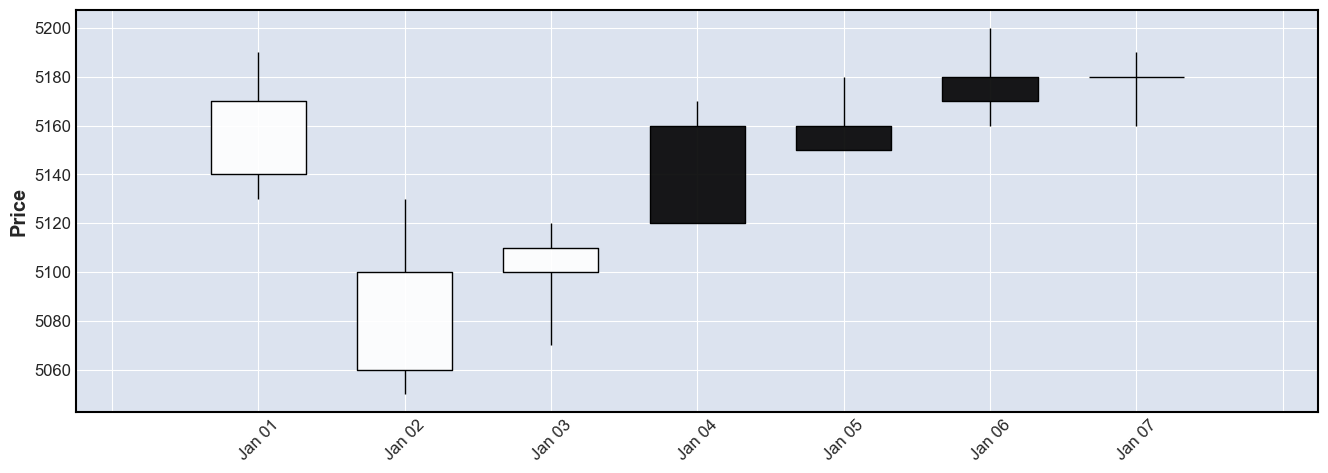

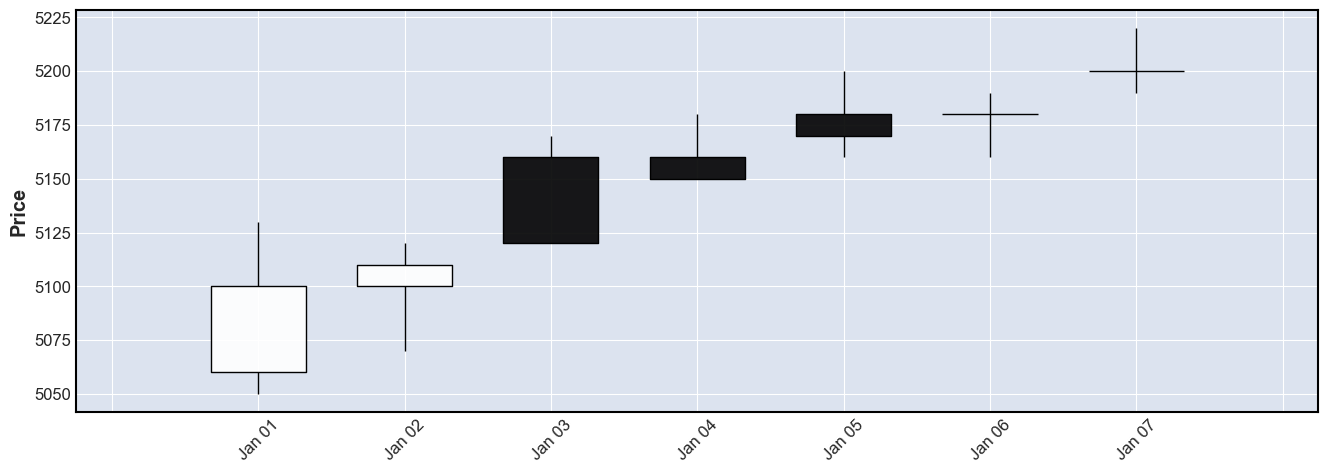

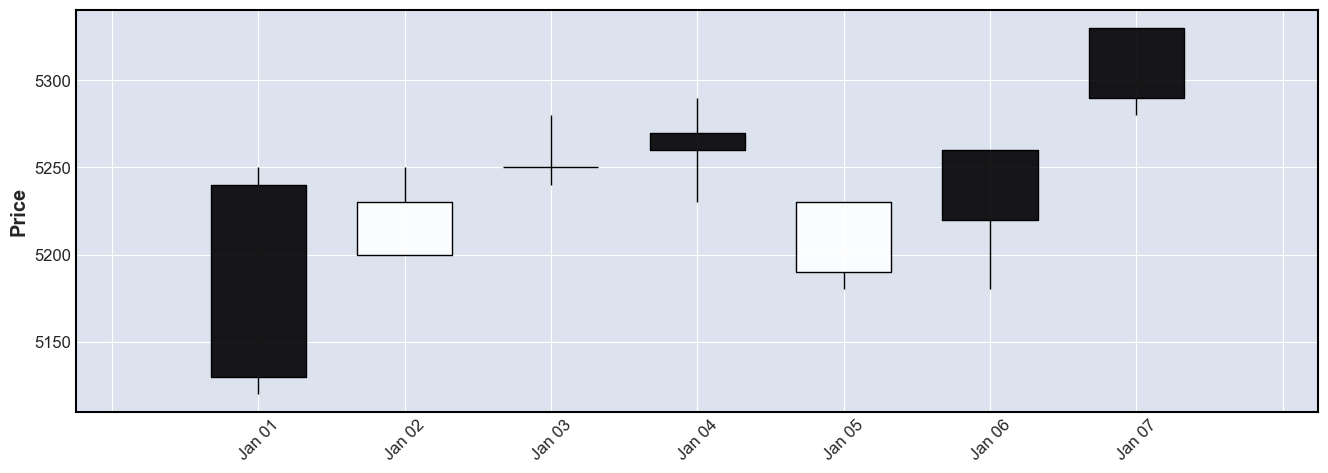

In [27]:
data_to_dataset(data_1,"../data/loson/train/1_","../data/loson/test/1_")

4

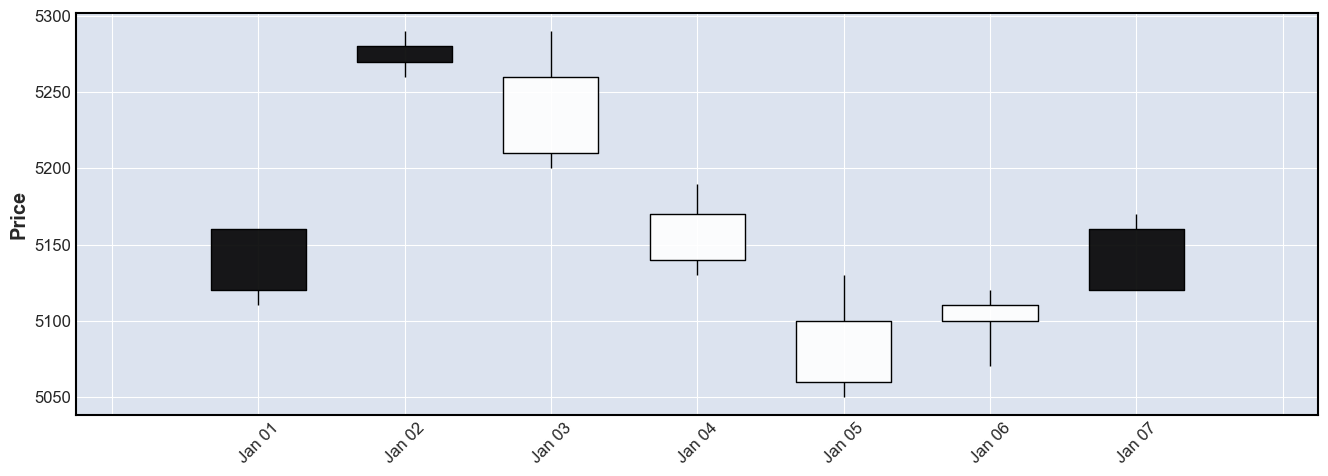

In [28]:
data_to_dataset(data_2,"../data/loson/train/0","../data/loson/test/0")

In [252]:
data_to_dataset(data_3,"../data/apple_data/train/1_","../data/apple_data/test/1_")

908

In [166]:
data_to_dataset(data_4,"../data/apple_data/train/0","../data/apple_data/test/0")

268